<h1>PyTorch Neural Net to train Car</h1>

This notebook is the start of project 2, using the example of PyTorch tutorials from PyTorch.org. In this notebook we switch to the use of a DataLoader and of the us e of <strong>PyTorch Lightning</strong>.

In [2]:
import pandas as pd
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

import mlflow.pytorch 
import pytorch_lightning as pl

import matplotlib.pyplot as plt

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [4]:
# We move our tensor to the GPU if available

# if torch.cuda.is_available():
#    tensor = tensor.to("cuda")

In [5]:
# import data in pandas
# df_train = pd.read_csv('../simpylc/sonar_1.samples', delim_whitespace=True,
#                  header=None, index_col=False)

df_train = pd.read_csv('../simpylc/lidar_1.samples', delim_whitespace=True,
                 header=None, index_col=False)

In [6]:
# check data type -> float, not object
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1528 non-null   float64
 1   1       1528 non-null   float64
 2   2       1528 non-null   float64
 3   3       1528 non-null   float64
 4   4       1528 non-null   float64
 5   5       1528 non-null   float64
 6   6       1528 non-null   float64
 7   7       1528 non-null   float64
 8   8       1528 non-null   float64
 9   9       1528 non-null   float64
 10  10      1528 non-null   float64
 11  11      1528 non-null   float64
 12  12      1528 non-null   float64
 13  13      1528 non-null   float64
 14  14      1528 non-null   float64
 15  15      1528 non-null   float64
 16  16      1528 non-null   float64
dtypes: float64(17)
memory usage: 203.1 KB


In [7]:
# check seperator -> 4 columns present?
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,7.4097,6.8168,8.3575,10.2320,12.9046,11.2148,5.7206,5.8557,20.0,20.0,5.2280,2.7302,4.2801,5.4935,1.4185,6.4051,-33.0
1,7.4097,6.8168,8.3575,10.2320,12.9046,11.2148,5.7206,5.8557,20.0,20.0,5.2280,2.7302,4.2801,5.4935,1.4185,6.4051,-33.0
2,7.4092,6.8163,8.3570,10.2316,12.9042,11.2145,5.7204,5.8556,20.0,20.0,5.2275,2.7297,4.2796,5.4929,1.4179,6.4045,-32.5
3,7.4092,6.8163,8.3570,10.2316,12.9042,11.2145,5.7204,5.8556,20.0,20.0,5.2275,2.7297,4.2796,5.4929,1.4179,6.4045,-32.5
4,7.4054,6.8127,8.3538,10.2285,12.9016,11.2124,5.7184,5.8543,20.0,20.0,5.2242,2.7262,4.2759,5.4891,1.4140,6.4005,-32.0


In [8]:
df_trainX = df_train.iloc[:,0:16]
df_trainX.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,7.4097,6.8168,8.3575,10.2320,12.9046,11.2148,5.7206,5.8557,20.0,20.0,5.2280,2.7302,4.2801,5.4935,1.4185,6.4051
1,7.4097,6.8168,8.3575,10.2320,12.9046,11.2148,5.7206,5.8557,20.0,20.0,5.2280,2.7302,4.2801,5.4935,1.4185,6.4051
2,7.4092,6.8163,8.3570,10.2316,12.9042,11.2145,5.7204,5.8556,20.0,20.0,5.2275,2.7297,4.2796,5.4929,1.4179,6.4045
3,7.4092,6.8163,8.3570,10.2316,12.9042,11.2145,5.7204,5.8556,20.0,20.0,5.2275,2.7297,4.2796,5.4929,1.4179,6.4045
4,7.4054,6.8127,8.3538,10.2285,12.9016,11.2124,5.7184,5.8543,20.0,20.0,5.2242,2.7262,4.2759,5.4891,1.4140,6.4005


In [9]:
df_trainY = df_train.iloc[:,-1]
df_trainY.head()

0   -33.0
1   -33.0
2   -32.5
3   -32.5
4   -32.0
Name: 16, dtype: float64

In [10]:
trainingSetX = torch.tensor(df_trainX.values, dtype = torch.float32)
trainingSetY = torch.tensor(df_trainY.values, dtype = torch.float32)

In [11]:
print(trainingSetX.shape)
print(trainingSetY.shape)

torch.Size([1528, 16])
torch.Size([1528])


In [12]:
# create DataLoader, then take one batch
# from batch_size=16 to 2500 (entire dataset)
loader = DataLoader(list(zip(trainingSetX,trainingSetY)), shuffle=False, batch_size=64)
for x_batch, y_batch in loader:
    # print(x_batch, y_batch)
    break

In [13]:
class AutoBrain(pl.LightningModule):    
    #def __init__(self, inputs, outputs):
    def __init__(self):
        
        super().__init__()
        
        # Advanced linear connections
        # self.inOut = nn.Linear(inputs, outputs)
        # self.inOut = nn.Linear(3,1)
        self.inOut = nn.Sequential(
            nn.Linear(16, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.SiLU(),
            # nn.ReLU(),
            nn.Linear(512, 1)
        )
        
            
    def forward(self, x):
        
        # return self.sigmoid(self.inOut(x))
        # return self.tanh(self.inOut(x))
        return self.inOut(x)
        # pass
        

In [14]:
# Train the model
# epochs = 200
# loss_fn = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.1)
# model.train()
# for epoch in range(epochs):
#     for x_batch, y_batch in loader:
#         y_hat = model(x_batch)
#         loss = loss_fn(y_hat, y_batch)
#         # print(y_hat-y_batch)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

In [15]:
print(x_batch)

tensor([[ 7.4097,  6.8168,  8.3575,  ...,  5.4935,  1.4185,  6.4051],
        [ 7.4097,  6.8168,  8.3575,  ...,  5.4935,  1.4185,  6.4051],
        [ 7.4092,  6.8163,  8.3570,  ...,  5.4929,  1.4179,  6.4045],
        ...,
        [ 4.3017, 20.0000,  3.6084,  ..., 20.0000,  1.5760, 20.0000],
        [ 4.3017, 20.0000,  3.6084,  ..., 20.0000,  1.5760, 20.0000],
        [20.0000,  4.2581, 20.0000,  ..., 20.0000,  4.0706,  1.5332]])


In [16]:
model = AutoBrain()

print(model)

AutoBrain(
  (inOut): Sequential(
    (0): Linear(in_features=16, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): SiLU()
    (6): Linear(in_features=512, out_features=1, bias=True)
  )
)


In [19]:
# Train the model



epochCount = 0

epochLoss = []

epochs = 300
loss_fn = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.001) # lr=0.01
optimizer = optim.Adagrad(model.parameters(), lr=0.01) # lr=0.01

# model.train()

for epoch in range(epochs):
    losses = 0
    
    for x_batch, y_batch in loader:
        y_hat = model(x_batch)
        loss = loss_fn(y_hat, y_batch)
        # print(y_hat-y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # print(loss.item())
        epochCount += 1
        losses += (loss.item())
        
    epochLoss.append((losses)/len(loader))
    # print(losses)

/home/pans/miniconda3/envs/miw/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/pans/miniconda3/envs/miw/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([56])) that is different to the input size (torch.Size([56, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [20]:
# evaluate accuracy after training
# LET OP: accuracy wordt vooral bij classificatie gebruikt. Dit is regressie. Beter is te kijken naar de loss, gebaseerd op MSE of RMSE.

model.eval()
y_hat = model(trainingSetX)
acc = (y_hat.round() == trainingSetY).float().mean()
acc = float(acc)
print("Model accuracy: %.2f%%" % (acc*100))

Model accuracy: 1.75%


In [21]:
display(loss)

tensor(2.8575, grad_fn=<MseLossBackward0>)

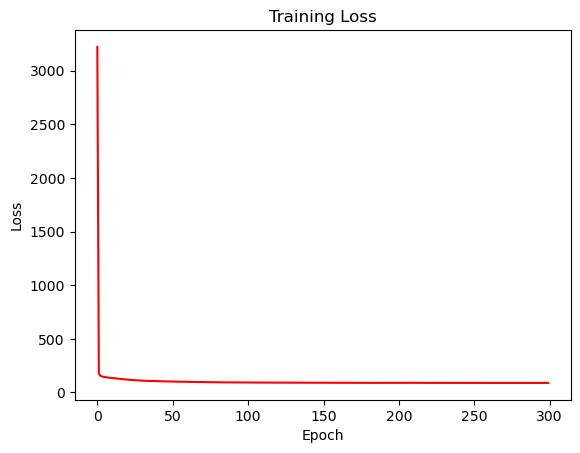

In [22]:
#----------------------------------------

fig, ax = plt.subplots()
ax.set(xlabel='Epoch', ylabel='Loss', title="Training Loss")

# plt.plot([x for x in range(epochs)], losses, 'red')
# plt.plot([x in], losses, 'red')
plt.plot(epochLoss, 'red')
plt.show()

#----------------------------------------

In [23]:
# Save trained model
# data/sonar_model_weights.pth heeft accuracy 57%
torch.save(model.inOut, 'data/lidar_model_large.pth')

In [130]:
import pickle

pickle.dump(model.inOut, open('data/sonar_model.pkl', 'wb'))


In [126]:
# To load trained model:
model = torch.load('data/sonar_model_weights_2.pth')
model.eval()

AutoBrain(
  (inOut): Sequential(
    (0): Linear(in_features=3, out_features=9, bias=True)
    (1): ReLU()
    (2): Linear(in_features=9, out_features=3, bias=True)
    (3): SiLU()
    (4): Linear(in_features=3, out_features=1, bias=True)
  )
)

In [127]:
pickled_model = pickle.load(open('data/sonar_model.pkl', 'rb'))

In [ ]:
pickled_model.eval()

AutoBrain(
  (inOut): Sequential(
    (0): Linear(in_features=3, out_features=9, bias=True)
    (1): ReLU()
    (2): Linear(in_features=9, out_features=3, bias=True)
    (3): SiLU()
    (4): Linear(in_features=3, out_features=1, bias=True)
  )
)

In [137]:
model(torch.tensor([0.9781, 1.1411, 2.2500]))

tensor([-7.7267], grad_fn=<AddBackward0>)